# Overview
Ran this query at https://data.stackexchange.com/datascience/query/new:
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019

A query like this was used to create a csv file we'll use to explore the data.

First, let's import all the libraries we'll need...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's import the csv and look at the data...

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB
None


In [3]:
questions = questions.fillna(0)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
print(questions.dtypes)

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object


In [4]:
#Cleaning up the Tags so they can be manipulated as strings...
questions['Tags'] = questions['Tags'].astype(str).str.replace('^<|>$','').str.split('><')
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5508,62941,2019-11-10 02:06:34,2,67,"[classification, loss-function]",2,0
3224,48081,2019-03-27 13:15:21,3,297,"[machine-learning, classification, vc-theory]",1,0
7722,54228,2019-06-21 15:38:05,0,105,"[r, linear-regression]",1,0
8828,55402,2019-07-10 06:24:42,0,87,"[machine-learning, deep-learning, convnet, con...",1,0
815,56360,2019-07-25 09:44:34,0,21,"[python, clustering, graphs]",0,0


Now let's create a dataframe of the tags by usage (per article) and by views (using "ViewCount")...

In [5]:
tag_usage = {}

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_usage:
            tag_usage[tag] += 1
        else:
            tag_usage[tag] = 1
            
tag_usage = pd.DataFrame.from_dict(tag_usage, orient='index')
tag_usage.rename(columns={0: 'Count'}, inplace=True)
tag_usage = tag_usage.sort_values(by='Count', ascending=False).head(20)
print(tag_usage)

                        Count
machine-learning         2693
python                   1814
deep-learning            1220
neural-network           1055
keras                     935
classification            685
tensorflow                584
scikit-learn              540
nlp                       493
cnn                       489
time-series               466
lstm                      402
pandas                    354
regression                347
dataset                   340
r                         268
predictive-modeling       265
clustering                257
statistics                234
machine-learning-model    224


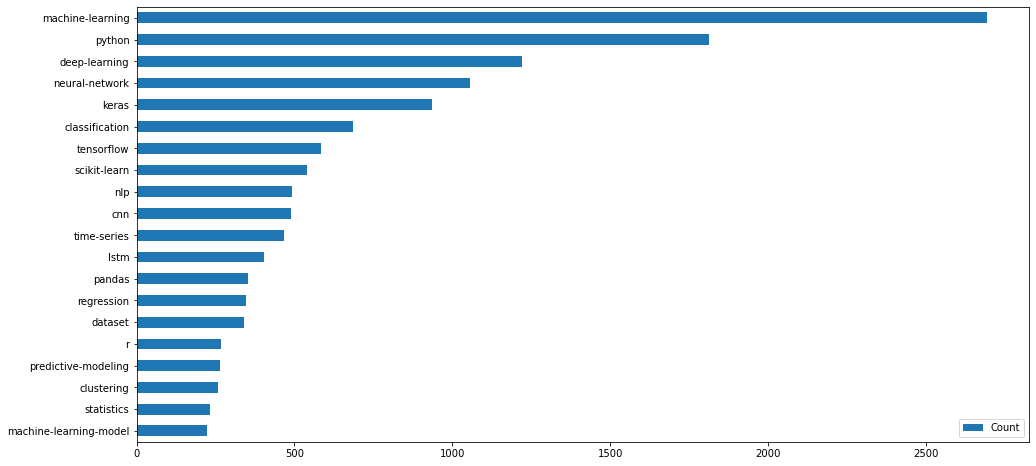

In [6]:
tag_usage.sort_values(by='Count').plot(kind='barh', figsize=(16,8))

In [7]:
tag_views = {}

for index,row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_views:
            tag_views[tag] += row['ViewCount']
        else:
            tag_views[tag] = row['ViewCount']
            
tag_views = pd.DataFrame.from_dict(tag_views, orient='index')
tag_views.rename(columns={0: 'Views'}, inplace=True)
tag_views = tag_views.sort_values(by='Views', ascending=False).head(20)
print(tag_views)

                   Views
python            537585
machine-learning  388499
keras             268608
deep-learning     233628
pandas            201787
neural-network    185367
scikit-learn      128110
tensorflow        121369
classification    104457
dataframe          89352
lstm               74458
nlp                71382
cnn                70349
time-series        64134
numpy              49767
regression         49451
dataset            43151
pytorch            40240
csv                38654
clustering         33928


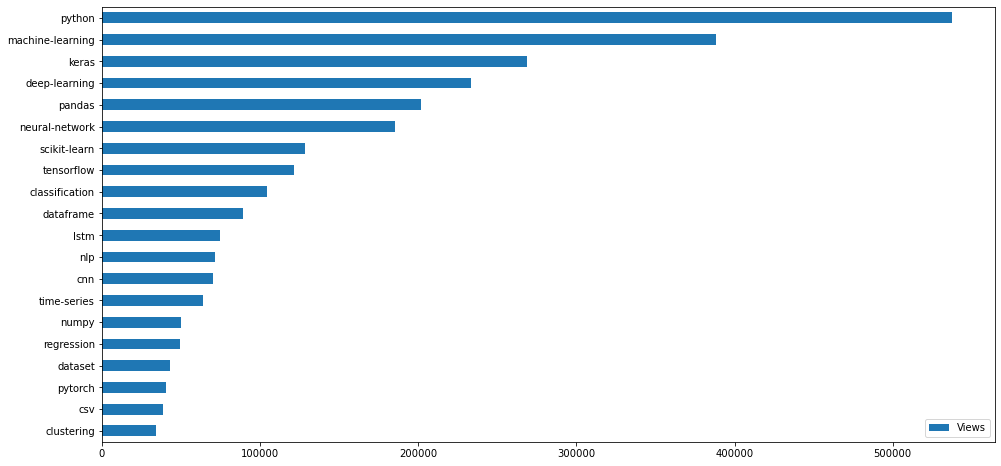

In [8]:
tag_views.sort_values(by='Views').plot(kind='barh', figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f802cd13af0>],
      dtype=object)

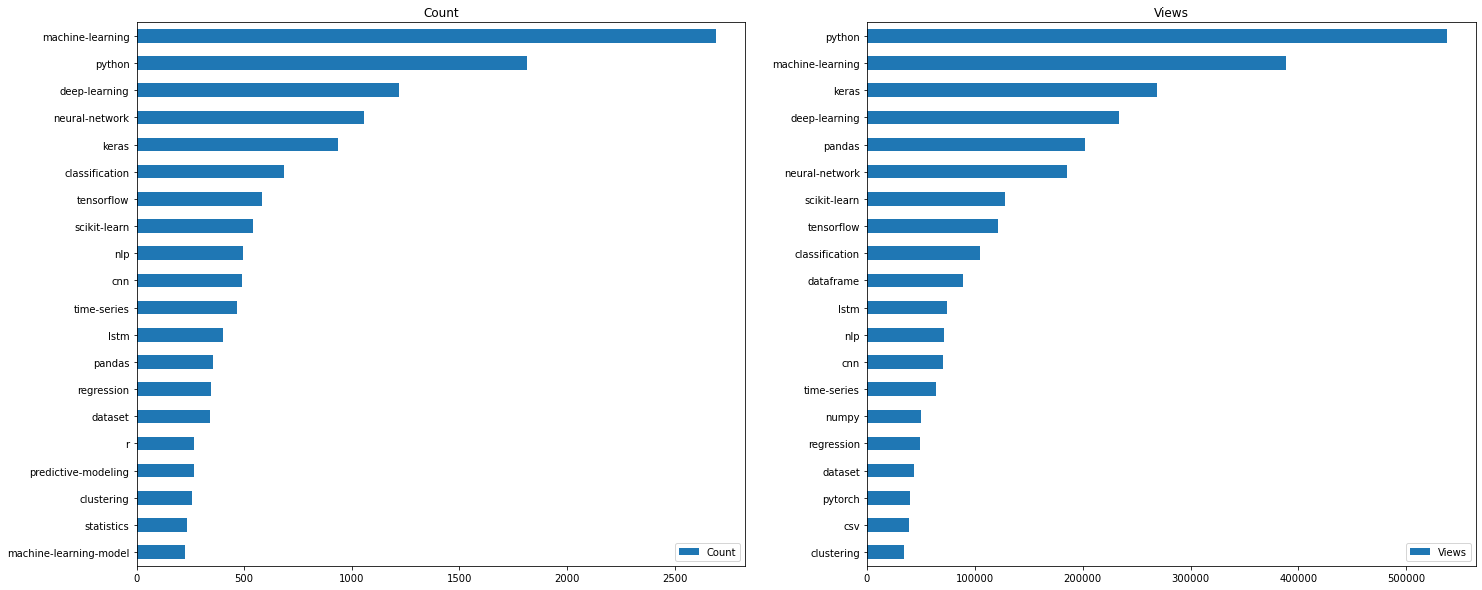

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
tag_usage.sort_values(by='Count').plot(kind="barh", ax=axes[0], subplots=True)
tag_views.sort_values(by='Views').plot(kind="barh", ax=axes[1], subplots=True)

In [11]:
in_usage = pd.merge(tag_usage, tag_views, how="left", left_index=True, right_index=True)

print(in_usage)

                        Count     Views
machine-learning         2693  388499.0
python                   1814  537585.0
deep-learning            1220  233628.0
neural-network           1055  185367.0
keras                     935  268608.0
classification            685  104457.0
tensorflow                584  121369.0
scikit-learn              540  128110.0
nlp                       493   71382.0
cnn                       489   70349.0
time-series               466   64134.0
lstm                      402   74458.0
pandas                    354  201787.0
regression                347   49451.0
dataset                   340   43151.0
r                         268       NaN
predictive-modeling       265       NaN
clustering                257   33928.0
statistics                234       NaN
machine-learning-model    224       NaN


In [12]:
in_views = pd.merge(tag_usage, tag_views, how="right", left_index=True, right_index=True)

print(in_views)

                   Count   Views
python            1814.0  537585
machine-learning  2693.0  388499
keras              935.0  268608
deep-learning     1220.0  233628
pandas             354.0  201787
neural-network    1055.0  185367
scikit-learn       540.0  128110
tensorflow         584.0  121369
classification     685.0  104457
dataframe            NaN   89352
lstm               402.0   74458
nlp                493.0   71382
cnn                489.0   70349
time-series        466.0   64134
numpy                NaN   49767
regression         347.0   49451
dataset            340.0   43151
pytorch              NaN   40240
csv                  NaN   38654
clustering         257.0   33928


A bit confused by the next few questions so I'm going to explore the solution. So first we're creating a dataframe of the tags, then expore the dataframe.

In [25]:
all_tags = list(tag_usage.index)

tag_associations = pd.DataFrame(index=all_tags, columns=all_tags)
tag_associations.fillna(0, inplace=True)

'''for tags in questions['Tags']:
    tag_associations.loc[tags,tags] += 1'''
    
print(tag_associations)

                        machine-learning  python  deep-learning  \
machine-learning                       0       0              0   
python                                 0       0              0   
deep-learning                          0       0              0   
neural-network                         0       0              0   
keras                                  0       0              0   
classification                         0       0              0   
tensorflow                             0       0              0   
scikit-learn                           0       0              0   
nlp                                    0       0              0   
cnn                                    0       0              0   
time-series                            0       0              0   
lstm                                   0       0              0   
pandas                                 0       0              0   
regression                             0       0              

In [27]:
qs_time = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

qs_time["Tags"] = qs_time["Tags"].str.replace("^<|>$", "").str.split("><")

qs_time.sample(5)

,Id,CreationDate,Tags
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
18725,54731,2019-06-29 04:40:54,[neural-network]
19258,64871,2019-12-15 12:45:54,"[machine-learning, deep-learning, data-mining,..."
1548,25126,2017-11-27 04:55:52,"[machine-learning, statistics]"
1506,15296,2016-11-23 00:31:46,"[machine-learning, python, classification, sci..."


In [30]:
def deep_learning(tags):
    for tag in tags:
        if tag in ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']:
            return 1
    return 0
    
qs_time['Deep_Learning'] = qs_time['Tags'].apply(deep_learning)

qs_time.sample(5)

,Id,CreationDate,Tags,Deep_Learning
17987,54187,2019-06-21 02:09:19,"[deep-learning, image-classification, gan]",1
81,69,2014-05-14 20:03:15,[processing],0
20935,66264,2020-01-10 11:08:35,[python],0
6114,58037,2019-08-22 17:43:16,"[deep-learning, object-detection, yolo]",1
3407,25989,2017-12-25 15:32:16,"[python, visualization, word2vec, word-embeddi...",0


In [31]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

qs_time["Quarter"] = qs_time["CreationDate"].apply(fetch_quarter)

qs_time.sample(5)

,Id,CreationDate,Tags,Deep_Learning,Quarter
18776,64619,2019-12-11 08:44:38,"[python, object-detection, ocr]",0,19Q4
10917,42376,2018-12-10 01:18:46,"[classification, data-mining, k-nn]",0,18Q4
18964,54789,2019-06-30 14:36:58,"[machine-learning, predictive-modeling, algori...",0,19Q2
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,19Q1
4134,26256,2018-01-04 03:49:53,"[machine-learning, deep-learning, predictive-m...",1,18Q1


In [33]:
quarterly = qs_time.groupby('Quarter').agg({"Deep_Learning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
20,19Q2,935,2393,0.390723
1,14Q3,13,189,0.068783
17,18Q3,685,1512,0.453042
2,14Q4,21,216,0.097222
5,15Q3,45,311,0.144695


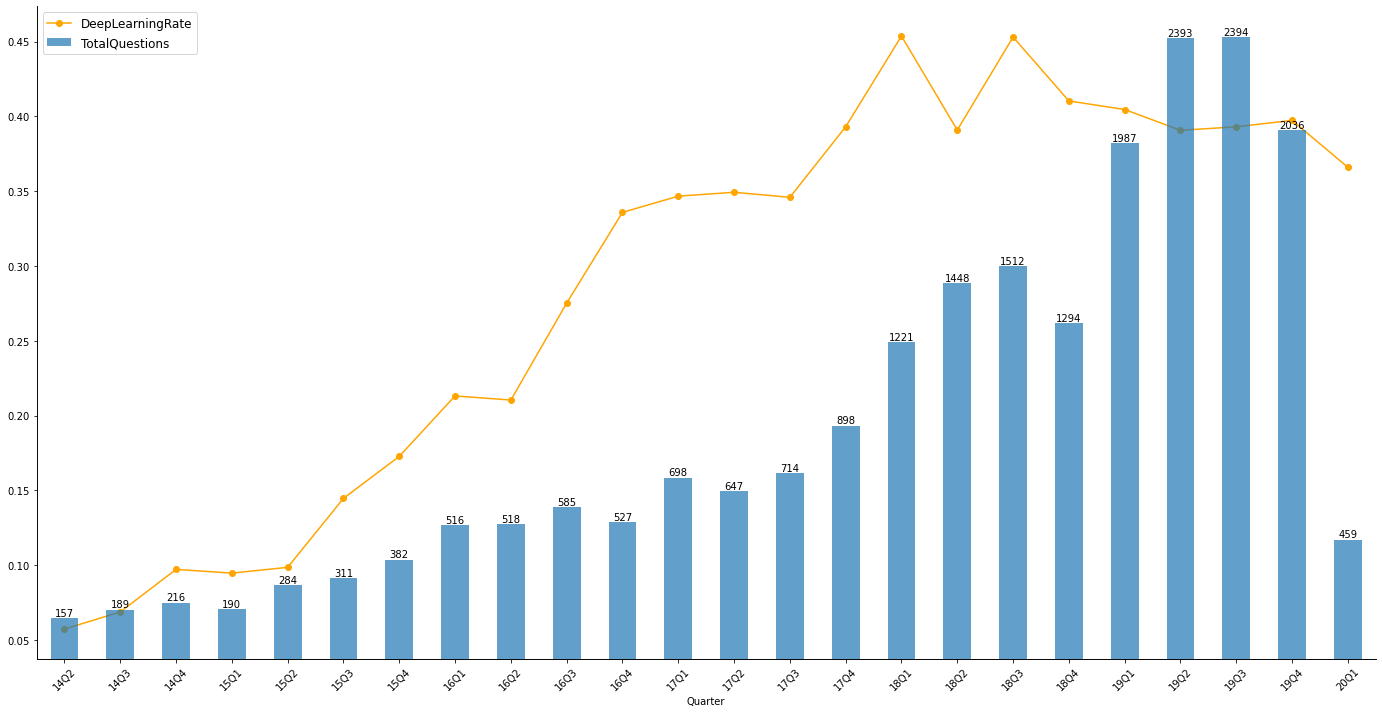

In [34]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)